# Metallic Forest

This notebook contains the analysis of the data for the problem nd some thoughts that
may come to my mind while working on it. The simulation is done using C++ code in
the folder `../simulation/` and it outputs the data we need and here we work with it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Diffusion

The first part of the problem is to handle diffusion. We're using the Langevin force of the form

$$ F = -\lambda v + \eta $$

where $\lambda$ is a friction coefficient and $\eta$ is a random force that has a gaussian distribution
with mean 0.

For testing if the code up to this point works, let's test that the evolution of the 
standard deviation follows the following:

$$ \sigma^2 = \sigma_0^2 + 2 D d t $$


In [2]:

data = pd.read_csv('../data/difusion.csv')

In [3]:
info = data.groupby(['t']).std()

info.head()

,x,y,z,v_x,v_y,v_z,u
t,,,,,,,
0.01,0.000000,0.000000,0.0,0.004511,0.005061,0.0,0.0
0.02,0.000045,0.000051,0.0,0.004511,0.005061,0.0,0.0
0.03,0.000140,0.000137,0.0,0.011289,0.010770,0.0,0.0
0.04,0.000266,0.000268,0.0,0.014778,0.015508,0.0,0.0
0.05,0.000414,0.000439,0.0,0.017531,0.019441,0.0,0.0


In [4]:
info['sx2'] = info.x **2
info['sy2'] = info.y **2
info.head()

,x,y,z,v_x,v_y,v_z,u,sx2,sy2
t,,,,,,,,,
0.01,0.000000,0.000000,0.0,0.004511,0.005061,0.0,0.0,0.000000e+00,0.000000e+00
0.02,0.000045,0.000051,0.0,0.004511,0.005061,0.0,0.0,2.028970e-09,2.565674e-09
0.03,0.000140,0.000137,0.0,0.011289,0.010770,0.0,0.0,1.955769e-08,1.880085e-08
0.04,0.000266,0.000268,0.0,0.014778,0.015508,0.0,0.0,7.087268e-08,7.177953e-08
0.05,0.000414,0.000439,0.0,0.017531,0.019441,0.0,0.0,1.714874e-07,1.929626e-07


Text(0.5, 1.0, 'Evolution of the variance in time')

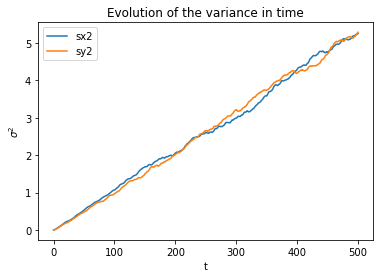

In [5]:

info.plot(y=['sx2', 'sy2'])

plt.ylabel(r"$\sigma^2$")
plt.title("Evolution of the variance in time")

The first thing we can see in this graph is that the evolution is actually linear! Now let's find out a little more

In [6]:
fit_x = np.polynomial.polynomial.Polynomial.fit(info.index, info['sx2'], deg=1).convert().coef
fit_y = np.polynomial.polynomial.Polynomial.fit(info.index, info['sy2'], deg=1).convert().coef


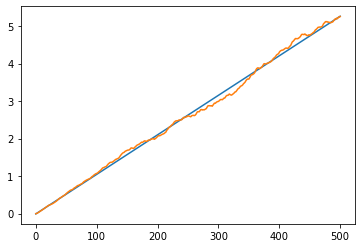

In [7]:
plt.plot(info.index, fit_x[0] + fit_x[1] * info.index)
plt.plot(info.index, info['sx2'])